<a href="https://colab.research.google.com/github/124shlomis/ML_COURSE/blob/master/HW4_Logistic_Regression_and_Grandient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework assignment 4 - Logistic Regression and Gradient Descent

In this assignment, we will return to the face recognition and solve it using linear logistic regression. We will use a simple gradient descent algorithm for solving the MLE optimization problem for the linear logistic regression model.

## Reminders

- Start by making a copy of this notebook in order to be able to save it.
- Use **Ctrl+[** to expend all cells.

## Tip of the day - Debugging with PDB (optional, for the advanced users):

One of the main problems in working with Colab / Jupyter is the lack of a good debugger.

A not so optimal solution (but sometimes better than nothing) is to use Python's built-in debugger. Python comes with a very basic command line based debugger called [PDB](https://docs.python.org/3/library/pdb.html). It has all the basic debugger capabilities but is missing a good interface.

You can drop into debug mode in the middle of any Python code simply by placing the command **pdb.set_trace()** before the line which you want to debug (only after importing the **pdb** package). Once in debug mode, the debugger prompt will appear in which you can use the following commands:

- **l** or **list**: to print the current line and the surrounding code.
- **n** or **next**: to run the current line.
- **c** or **continue**: to continue running until a breakpoint or until the end of the function.
- **q** or **quit**: to stop the run and exit the debugger.
- **b \<number\>**: Place a breakpoint in line \<number\>
- **!\<python expression\>**: to run any python expression.

(This is only a partial list of the PDB's commands. For the full list of commands you can refer to the [official documentation](https://docs.python.org/2/library/pdb.html#debugger-commands), or at [this cheat sheet](https://kapeli.com/cheat_sheets/Python_Debugger.docset/Contents/Resources/Documents/index))

Let us look at an example:

- Add the line **pdb.set_trace()** to the following code just before the **x **= 2**  line, and execute the cell to drop into debug mode.
- Type **l** (followed by **Enter**) to print the current line and surrounding code.
- Type **!print(x)** to print the value of the variable **x** (you can also omit the print command and just use **!x** in this case).
- Type **!x=2** to change the value of **x**.
- Type **n** execute the next line.
- Type **l** again.
- Type **!print(x)** again.
- Type **b 10** to place a breakpoint on the **return x** line.
- Type **c** to run the code until the breakpoint.
- Type **l** again.
- Type **!print(x)** again.
- Type **c** or **q** to quit the debugger with or without finishing to run the code
- After you finish playing with the debugger make sure you remove or comment out the **pdb.set_trace()** line.
- Clear our all the debugger output (before submitting the code). You can do so, for example, by pressing the **X** button left to the cell's output area.

In [52]:
import pdb

def func(x):
    x += 2
    x *= 4
    x -= 2
    x /= 2
    
    return x

print(func(3))

9.0


### !! Important

- The **pdb.set_trace()** command can be placed anywhere, but stepping through the code (using the **n** command) is only possible inside functions.
- **You must exit the debugger** (using **c** or **q**) in order to be able to run any other cells.

## Your IDs

✍️ Fill in your IDs in the cell below:

In [53]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
# Replace the IDs bellow with our own
student1_id = '012345678'
student2_id = '012345678'
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('Hello ' + student1_id + ' & ' + student2_id)

Hello 012345678 & 012345678


### Importing Packages

Importing the NumPy, Pandas and Matplotlib packages.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This line makes matplotlib plot the figures inside the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (8.0, 8.0)  # Set default plot's sizes
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Preparing the data

As stated earlier, we will work again with the same dataset as in the last assignment (the Labeled Faces in the Wild dataset), and we will also use the same PCA features. We will make 2 significant changes in the preparation process from last time:
1. We will split the data into 60% train / 20 % validation / 20% test.
2. We will add an additional constant value of 1 to the feature vector. In other words, change the feature vector from $\left[\phi_1(x), \phi_2(x), \ldots, \phi_n(x)\right]^T$ to $\left[\phi_1(x), \phi_2(x), \ldots, \phi_n(x), 1\right]^T$.

✍️ Complete the code below to load the data, split it, and extract the PCA features.

Number of images in the dataset: 1560
Number of different persons in the dataset: 12
Each images size is: (62, 47)


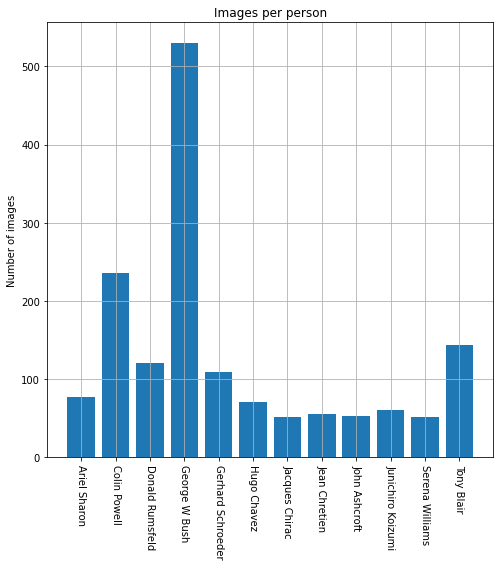

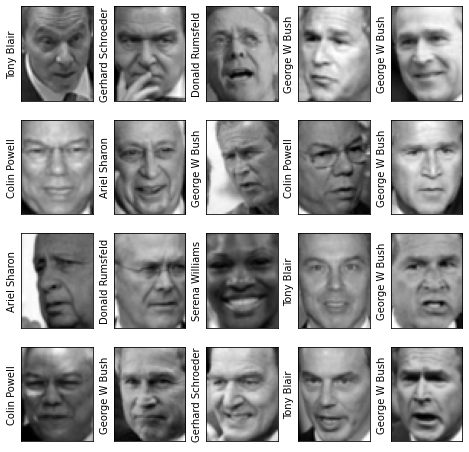

In [55]:
from sklearn.datasets import fetch_lfw_people

def load_lfw_dataset():
    """
    Loading the Labeled faces in the Wild dataset.
    Load only face of person which appear at least 50 times in the dataset.

    Using:
    - N: The number of samples in the dataset.
    - H: the images' height
    - W: the images' width
    - K: The number of classes.
   
    Returns
    -------
    x: ndarray
        The N x H x W array of images.
    y: ndarray
        The 1D array of length N of labels.
    n_classes: int
        The number of different classes, K.
    label_to_name_mapping: list
        A list of K strings containing the name related to each label.
    image_shape: list
        The image's shape as the list: [H, W]
    
    """

    dataset = fetch_lfw_people(min_faces_per_person=50)

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    x = dataset.images
    y = dataset.target
    label_to_name_mapping = dataset.target_names
    image_shape = x[0].shape
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    n_classes = y.max() + 1  ## The number of classes.
    
    return x, y, n_classes, label_to_name_mapping, image_shape

x, y, n_classes, label_to_name_mapping, image_shape = load_lfw_dataset()

print('Number of images in the dataset: {}'.format(len(x)))
print('Number of different persons in the dataset: {}'.format(n_classes))
print('Each images size is: {}'.format(image_shape))

_, images_per_class = np.unique(y, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label_to_name_mapping, images_per_class)
ax.set_xticklabels(label_to_name_mapping, rotation=-90);
ax.set_title('Images per person')
ax.set_ylabel('Number of images')

fig, ax_array = plt.subplots(4, 5)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x[i], cmap='gray')
    ax.set_ylabel(label_to_name_mapping[y[i]])
    ax.set_yticks([])
    ax.set_xticks([])

In [56]:
def split_dataset(x, y, train_fraction=0.6, validation_fraction=0.2):
    """
    Split the data

    Parameters
    ----------
    x: ndarray
        The N x H x W array of images.
    y: ndarray
        The 1D array of length N of labels.
    train_fraction: float
        The fraction of the dataset to use as the train set.
    validation_fraction: float
        The fraction of the dataset to use as the validation set.

    Returns
    -------
    n_samples_train: int
        The number of train samples.
    x_train: ndarray
        The n_samples_train x H x W array of train images.
    y_train: ndarray
        The 1D array of length n_samples_train of train labels.
    n_samples_val: int
        The number of validation samples.
    x_val: ndarray
        The n_samples_val x H x W array of validation images.
    y_val: ndarray
        The 1D array of length n_samples_val of validation labels.
    n_samples_test: int
        The number of test samples.
    x_test: ndarray
        The n_samples_test x H x W array of test images.
    y_test: ndarray
        The 1D array of length n_samples_test of test labels.
    """
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    rand_gen = np.random.RandomState(0)
    n_samples = len(x)
    indices = np.arange(0,n_samples)
    rand_gen.shuffle(indices)

    n_samples_train = int(n_samples * train_fraction)
    n_samples_val = int(n_samples * validation_fraction)
    n_samples_test = n_samples - (n_samples_train + n_samples_val)
    train_indices = indices[0:n_samples_train] ## Assign the first n_samples_train values of the indices array to train_indices
    val_indices = indices[n_samples_train:(n_samples_train + n_samples_val)]
    test_indices = indices[(n_samples_train + n_samples_val):] ## Assign the last n_samples_test values of the indices array to test_indices

    x_train = x[train_indices]
    x_val = x[val_indices]
    x_test = x[test_indices]

    y_train = y[train_indices]
    y_val = y[val_indices]
    y_test = y[test_indices]
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return n_samples_train, x_train, y_train, n_samples_val, x_val, y_val, n_samples_test, x_test, y_test

n_samples_train, x_train, y_train, n_samples_val, x_val, y_val, n_samples_test, x_test, y_test = split_dataset(x, y)

print('Number of training samples: {}'.format(n_samples_train))
print('Number of validation samples: {}'.format(n_samples_val))
print('Number of test samples: {}'.format(n_samples_test))

Number of training samples: 936
Number of validation samples: 312
Number of test samples: 312


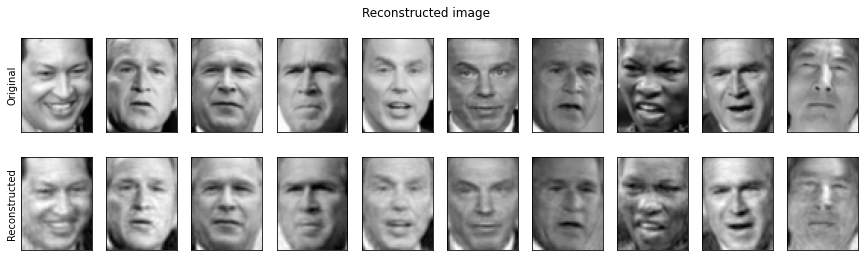

In [57]:
from sklearn.decomposition import PCA
def generate_pca_object(x_train, n_pca_components=300):
    """
    Generate a training sklearn.decomposition.PCA object.

    Using:
    - N: The number of samples in x_train.

    Parameters
    ----------
    x_train: ndarray
        The N x H x W array of train images.
    n_pca_components: int
        The number of PCA components to use.

    Returns
    -------
    pca: sklearn.decomposition.PCA 
        The trained sklearn.decomposition.PCA object which can perform the PCA decomposition and reconstruction
    """
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    pca = PCA(n_pca_components)
    x_flat_train = x_train.reshape(len(x_train), -1) ## Reshape the training data to (n_smaples_train x 2914)
    pca.fit(x_flat_train)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return pca


def extract_features(x, pca):
    """
    Extract features from the images, which include the PCA elements and the constant 1.

    Using:
    - N: The number of samples in x.
    - D_PCA: The number of components.

    Parameters
    ----------
    x: ndarray
        The N x H x W array of images (x can be either the train, validation or test dataset).
    pca: sklearn.decomposition.PCA 
        The trained sklearn.decomposition.PCA object which can perform the PCA decomposition and reconstruction

    Returns
    -------
    features: ndarray
        The N x (D_PCA + 1) array of features.
    """
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    x_flat = x.reshape(len(x), -1)
    ones_column = np.ones((x_flat.shape[0],1))
    features_not_extanded = pca.transform(x_flat)
    features = np.hstack((features_not_extanded,ones_column)) 
     ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
   
    return features

pca = generate_pca_object(x_train)
features_train = extract_features(x_train, pca)
features_val = extract_features(x_val, pca)
features_test = extract_features(x_test, pca)

## Ploting the reconstruction of the first 10 test images
reconstructed_images_flat = pca.inverse_transform(features_test[:, :-1])
reconstructed_images = reconstructed_images_flat.reshape(-1, *image_shape)
fig, ax_array = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    ax_array[0][i].imshow(x_test[i], cmap='gray')
    ax_array[0][i].set_yticks([])
    ax_array[0][i].set_xticks([])

    ax_array[1][i].imshow(reconstructed_images[i], cmap='gray')
    ax_array[1][i].set_yticks([])
    ax_array[1][i].set_xticks([])
ax_array[0][0].set_ylabel('Original')
ax_array[1][0].set_ylabel('Reconstructed')
fig.suptitle('Reconstructed image');

## The Model

**Notation**: For simplicity, from here on we will use $\boldsymbol{x}$ to donate the feature vector (instead of using $\boldsymbol{\phi\left(\boldsymbol{x}\right)}$). in the code make sure to use the features vectors/matrices in all calculations.

The multi-class linear logistic regression model models the conditional probability of the labels using the following model:
$$
p\left(y|\boldsymbol{x};\left\{\boldsymbol{\theta}_{k}\right\}\right)=\frac{e^{\boldsymbol{\theta}_{y}^T\boldsymbol{x}}}{\sum_{k'} e^{\boldsymbol{\theta}_{k'}^T\boldsymbol{x}}}
$$

Note that in the multi-class case, we have multiple $\boldsymbol{\theta}_k$ vectors (one for each class).

**A comment**: We saw in class that it is common to set $\boldsymbol{\theta}_0=\vec{0}$ without loss of generality, we will not do so where in order to keep our code simple.

We shall define the following notations:
- $D$: the number of features.
- $N$: the number of samples.
- $K$: the number of classes.
- $X$: The matrix of features:
$$
X=
\left[\begin{matrix}
\boldsymbol{x}_0^T \\
\vdots \\
\boldsymbol{x}_{N-1}^T \\
\end{matrix}\right]
=
\left[\begin{matrix}
x_{0,0} & x_{0,1} & \ldots & x_{0,D-1} \\
\vdots & \ddots & \ddots & \vdots \\
x_{N-1,0} & x_{N-1,1} & \ldots & x_{N-1,D-1} \\
\end{matrix}\right]
$$
- $\Theta$: The matrix of all parameters of the model:
$$
\Theta=
\left[\begin{matrix}
\boldsymbol{\theta}_0^T \\
\vdots \\
\boldsymbol{\theta}_{K-1}^T \\
\end{matrix}\right]
=
\left[\begin{matrix}
\theta_{0,0} & \theta_{0,1} & \ldots & \theta_{0,D-1} \\
\vdots & \ddots & \ddots & \vdots \\
\theta_{K-1,0} & \theta_{K-1,1} & \ldots & \theta_{K-1,D-1} \\
\end{matrix}\right]
$$
- $\sigma\left(\boldsymbol{q}\right)$:The [softmax function](https://en.wikipedia.org/wiki/Softmax_function) which is define as:
$$
\sigma\left(\boldsymbol{q},k\right)=\frac{e^{q_k}}{\sum_{k'} e^{q_{k'}}}
$$

Using the softmax function, we can write the conditional probability of the labels as:
$$
p\left(y|\boldsymbol{x};Theta\right)=\sigma\left(\Theta\boldsymbol{x},y\right)\left(=\frac{e^{\boldsymbol{\theta}_{y}^T\boldsymbol{x}}}{\sum_{k'} e^{\boldsymbol{\theta}_{k'}^T\boldsymbol{x}}}\right)
$$



✍️ Complete the code below to define the functions calculating the softmax function:

- The code should in fact calculate the softmax function for $N$ vectors $\boldsymbol{q}_i$ and for all $k$ values, i.e. it perform the following calculation:
$$
f\left(\left[\begin{matrix}
\boldsymbol{q}_0^T \\
\vdots \\
\boldsymbol{q}_{N-1}^T \\
\end{matrix}\right]\right)
=
\left[\begin{matrix}
\sigma\left(\boldsymbol{q}_0,0\right) & \sigma\left(\boldsymbol{q}_0,1\right) & \ldots & \sigma\left(\boldsymbol{q}_0,K-1\right) \\
\vdots & \ddots & \ddots & \vdots \\
\sigma\left(\boldsymbol{q}_{N-1},0\right) & \sigma\left(\boldsymbol{q}_{N-1},1\right) & \ldots & \sigma\left(\boldsymbol{q}_{N-1},K-1\right) \\
\end{matrix}\right]
$$

In [58]:
## Define the softmax function
def softmax(q_mat):
    """
    A function which calculates the softmax function for a matrix which contains N q-vectors.

    Using:
    - N: The number of q vectors.
    - K: The length of every q vector.

    Parameters
    ----------
    q_mat: ndarray
        The N x K array of the N q vectors: q{1},...,q{N-1}
        
        q_mat = [[q{0}{1}, q{0}{2}, ..., q{0}{K-1}], 
                 ...,
                 [q{N-1}{1}, q{N-1}{2}, ..., q{N-1}{K-1}]]

    Returns
    -------
    res: ndarray
        The N x K array of the output of the soft max function for every n and every k:
        res = [[sigma(q{0},0), sigma(q{0},1), ..., sigma(q{0},K-1)], 
               ...,
               [sigma(q{N-1},0), sigma(q{N-1},1), ..., sigma(q{N-1},K-1)]]
    """
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    res = np.exp(q_mat) / np.sum(np.exp(q_mat), axis=1, keepdims=True)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return res

## Testing the function
test_q_mat = np.array([[1, -3, 2],
                       [-2, 1, -1]])
print(softmax(test_q_mat))

[[0.26762315 0.00490169 0.72747516]
 [0.04201007 0.84379473 0.1141952 ]]


Make sure the result you get is:
```
[[0.26762315 0.00490169 0.72747516]
 [0.04201007 0.84379473 0.1141952 ]]
```
(notice that each row must be a valid distribution matrix, i.e. positive and sum up to 1)


## The MLE problem

To select the models parameters $\Theta$ we would use MLE. The MLE problem is given by:

$$
\begin{align*}
\boldsymbol{\theta}^*
& = \underset{\boldsymbol{\theta}}{\arg\max}\ \mathcal{L}\left(\left\{\boldsymbol{\theta}_k\right\};\left\{\boldsymbol{x}_i,y_i\right\}\right) \\
& = \underset{\boldsymbol{\theta}}{\arg\min}\ -l\left(\left\{\boldsymbol{\theta}_k\right\};\left\{y_i,\boldsymbol{x}_i\right\}\right) \\
& = \underset{\boldsymbol{\theta}}{\arg\min}-\frac{1}{N}\sum_i\log\left(p\left(y_i|\boldsymbol{x}_i;\left\{\boldsymbol{\theta}_k\right\}\right)\right) \\
& = \underset{\boldsymbol{\theta}}{\arg\min}-\frac{1}{N}\sum_i\log\left(\sigma\left(\Theta\boldsymbol{x},y_i\right)\right) \\
\end{align*}
$$

(For convenience we have add a $\frac{1}{N}$ term before the summation. This does not effect the selection of the optimal $\Theta$, but prevents the objective to scale with the number of samples) 

We will solve this optimization problem using the gradient descent algorithm. The objective function $g$ of the optimization problem is:

$$
g\left(\Theta;X,\boldsymbol{y}\right)=-\frac{1}{N}\sum_i\log\left(\sigma\left(\Theta\boldsymbol{x}_i,y_i\right)\right)
$$

✍️ Complete the code bellow to define the objective function $g$:

- Use the **softmax** function which we have defined above.
- If needed, use a loop over the $K$ classes along with and a vector of indices: **indices = (y == k)**. Do not use a loop over the $N$ samples.
- You can also implement the function without any loops at all (which is slightly more efficient and elegant). This can be does using the following [integer array indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#integer-array-indexing): **arr\[np.range(len(y)),y\]** which selects the following sub array: **\[arr[0,y_0],arr[1,y_1],...,arr[N,y_N]\]**.

In [59]:
## Define the objective function
def g(theta, x, y):
    """
    The objective function.

    Using:
    - N: The number of q vectors.
    - D: The number of features (n_pca_componens + 1).
    - K: The length of every q vector.

    Parameters
    ----------
    theta: ndarray
        The K x D parameters matrix.
    x: ndarray
        The N x D features matrix.
    y: ndarray
        The 1D array of length N of labels.

    Returns
    -------
    res: float
        The objective function evaluated at the given theta.
    """

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    N = len(y)
    q = x @ np.transpose(theta)
    log_sigma = np.log(softmax(q))
    res = (-1/N) * np.sum(log_sigma[np.arange(N),y])
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return res

## Testing the function
test_theta = np.array([[1, -3, 2],
                       [-2, 1, -1]])
test_x = np.array([[0.1, 0.7, -0.2],
                   [0.5, -0.2, 0.5]])
test_y = np.array([1, 0])
print(g(test_theta, test_x, test_y))

0.03309409219672653


Make sure the result you get is: $0.033094\ldots$


### Calculating the Gradient

For the gradient decent algorithm we will need to be able to calculate $\nabla_\Theta g\left(\Theta;X,\boldsymbol{y}\right)$. 

Note that $\Theta$ here is a matrix and not a vector. The notation $\nabla_\Theta g\left(\Theta;X,\boldsymbol{y}\right)$ means:
$$
\nabla_\Theta g\left(\Theta\right)=
\left[\begin{matrix}
\frac{\partial g\left(\Theta\right)}{\partial\theta_{0,0}} & \frac{\partial g\left(\Theta\right)}{\partial\theta_{0,1}} & \ldots & \frac{\partial g\left(\Theta\right)}{\partial\theta_{0,D-1}} \\
\vdots & \ddots & \ddots & \vdots \\
\frac{\partial g\left(\Theta\right)}{\partial\theta_{K-1,0}} & \frac{\partial g\left(\Theta\right)}{\partial\theta_{K-1,1}} & \ldots & \frac{\partial g\left(\Theta\right)}{\partial\theta_{K-1,D-1}} \\
\end{matrix}\right]
$$

Calculate $\nabla_\Theta g\left(\Theta;X,\boldsymbol{y}\right)$ using the following steps:

1. $\frac{\partial}{\partial q_\tilde{k}}\sigma\left(\boldsymbol{q},k\right)=\sigma\left(\boldsymbol{q},k\right)\left(\delta_{k,\tilde{k}}-\sigma\left(\boldsymbol{q},k\right)\right)$.

(Here $\delta_{k,\tilde{k}}$ is the Kronecker delta:  $\delta_{k,\tilde{k}}=I\left\{k=\tilde{k}\right\}$)

2. $-\frac{\partial}{\partial q_\tilde{k}}\log\left(\sigma\left(\boldsymbol{q},k\right)\right)=?$

3. $-\frac{\partial}{\partial \theta_{\tilde{k},j}}\log\left(\sigma\left(\Theta\boldsymbol{x},k\right)\right)=\left.\left(-\frac{\partial}{\partial q_\tilde{k}}\log\left(\sigma\left(\boldsymbol{q},k\right)\right)\right)\right|_{\boldsymbol{q}=\Theta\boldsymbol{x}}\cdot \frac{\partial\boldsymbol{\theta}_\tilde{k}^T\boldsymbol{x}}{\partial \theta_{\tilde{k},j}}=?$

4. $\frac{\partial}{\partial \theta_{k,j}}g\left(\Theta;X,\boldsymbol{y}\right)=?$

Write the last tern as a matrix multiplication of the form:
$$
\nabla_\Theta g\left(\Theta\right)=\frac{1}{N}AX
$$

What are the elements $a_{i,j}$ of the matrix $A$? $X$ is the features matrix. Use this matrix $A$ when implementing the gradient function.

✍️ Complete the code below to define the functions for calculating $\nabla_\Theta g$:
- use the **softmax** function .
- If needed, use a loop over the $K$ classes, or no loops at all.

In [60]:
## Define the gradient of h
def grad_g(theta, x, y):
    """
    The gradient of the objective function.

    Using:
    - N: The number of q vectors.
    - D: The number of features (n_pca_components + 1).
    - K: The length of every q vector.

    Parameters
    ----------
    theta: ndarray
        The K x D parameters matrix.
    x: ndarray
        The N x D features matrix.
    y: ndarray
        The 1D array of length N of labels.

    Returns
    -------
    res: ndarray
        The K x D matrix of gradients.
    """

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    N = len(y)
    q = x @ np.transpose(theta)
    sigma = softmax(q)
    delta = np.zeros(sigma.shape)
    delta[np.arange(N),y] = 1
    A = np.transpose(sigma - delta)
    res = (1/N) * (A @ x)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return res

## Compering the function to numeric calculation on random points:
n_features = features_train.shape[1]
rand_gen = np.random.RandomState(0)
eps = 1e-10
for i in range(5):
    theta = rand_gen.randn(n_classes, n_features) / 100  ## Generate a random theta
    k = rand_gen.randint(n_classes) ## Select a random component in of theta
    j = rand_gen.randint(n_features)
    delta = np.zeros_like(theta) ## Create a small delta_theta vector of the nemerical gradient calculation
    delta[k, j] = eps
    
    numerical_diff = (g(theta + delta, features_train, y_train) - g(theta, features_train, y_train))/ eps
    analitical_diff = grad_g(theta, features_train, y_train)[k, j]

    print('Test #{}'.format(i))
    print('The numerical gradient is: {}'.format(numerical_diff))
    print('The analitical gradient is: {}'.format(analitical_diff))

Test #0
The numerical gradient is: -0.44224179873708636
The analitical gradient is: -0.4422850252341669
Test #1
The numerical gradient is: -0.2319211489520967
The analitical gradient is: -0.23194796417954255
Test #2
The numerical gradient is: 1.120810111387982
The analitical gradient is: 1.1207537224000206
Test #3
The numerical gradient is: 56.06551667369786
The analitical gradient is: 56.06548641598958
Test #4
The numerical gradient is: -0.13109513474773848
The analitical gradient is: -0.13117273531435772


Make sure the difference between the analitical and numerical result is smaller then 1%.

## The Gradient Decent Algorithm

✍️ Complete the code below to implement a basic gradient descent algorithm (without a stop criteria):

- Initialize $\Theta$ to zero. (This is usually not a good initialization, but we will not discuss this here).
- Run **n_iters** steps of the update step: $\Theta^{\left(k+1\right)}=\Theta^{\left(k\right)}-\alpha\nabla_\Theta g\left(\Theta^{\left(k\right)}\right)$
- For each iteration evaluate and store the value of the objective function using the train set and the validation set.

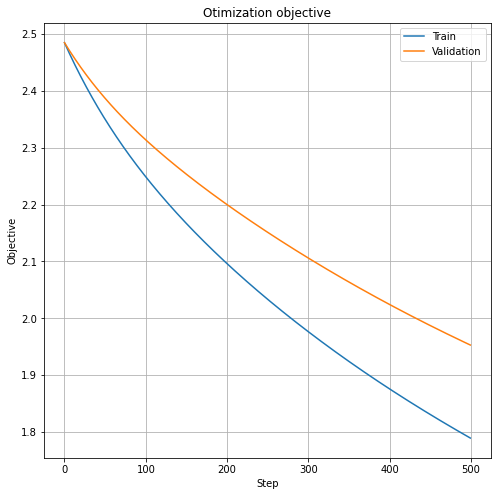

In [61]:
def basic_gradient_decent(g, grad_g, alpha, n_iters, x_train, y_train, x_val, y_val):
    """
    The gradient of the objective function.

    Using:
    - N: The number of samples.
    - D: The number of features (n_pca_componens + 1).
    - K: The length of every q vector.

    Parameters
    ----------
    g: funcion
        The objective function.
    grad_g: funcion
        The gradient of the objective function.
    alpha: float
        The learning rate.
    n_iters:
        The number of steps to take.
    x_train: ndarray
        The N x D features matrix of the train set.
    y_train: ndarray
        The 1D array of length N of labels of the validation set.
    x_val: ndarray
        The N x D features matrix of the train set.
    y_val: ndarray
        The 1D array of length N of labels of the validation set.

    Returns
    -------
    theta: ndarray
        The K x D parameters matrix which the algorithm produces.
    objectives_array_train: ndarray
        A 1D array of length n_iters which contains the value of the objective 
        at each step evaluated on the train set.
    objectives_array_train: ndarray
        A 1D array of length n_iters which contains the value of the objective 
        at each step evaluated on the validation set.
    """
    
    n_classes = max(y_train) + 1
    n_features = x_train.shape[1]
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    theta = np.zeros((n_classes, n_features))
    objectives_array_train = np.zeros(n_iters)
    objectives_array_val = np.zeros(n_iters)
    
    for k in range(n_iters):
      objectives_array_train[k] =  g(theta, x_train, y_train) 
      objectives_array_val[k] = g(theta, x_val, y_val)
      grad_g_cal = grad_g(theta, x_train, y_train)
      theta = theta - alpha * grad_g_cal

    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return theta, objectives_array_train, objectives_array_val

alpha = 1e-7
n_iters = 500
theta, objectives_array_train, objectives_array_val = basic_gradient_decent(g, grad_g, alpha, n_iters, features_train, y_train, features_val, y_val)

## Plot the objective
## ==================
fig, ax = plt.subplots()
ax.plot(objectives_array_train, label='Train')
ax.plot(objectives_array_val, label='Validation')
ax.set_title('Otimization objective')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.legend();

## Different Learning Rates

✍️ Complete the following code to plot the learning curve for the following learning rates: $\left[10^{-2},10^{-3},10^{-4},10^{-5},10^{-6},10^{-7}\right]$

- It ok if you get some warnings. This happens for the cases where the learning rates are too large and the algorithm to diverge.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


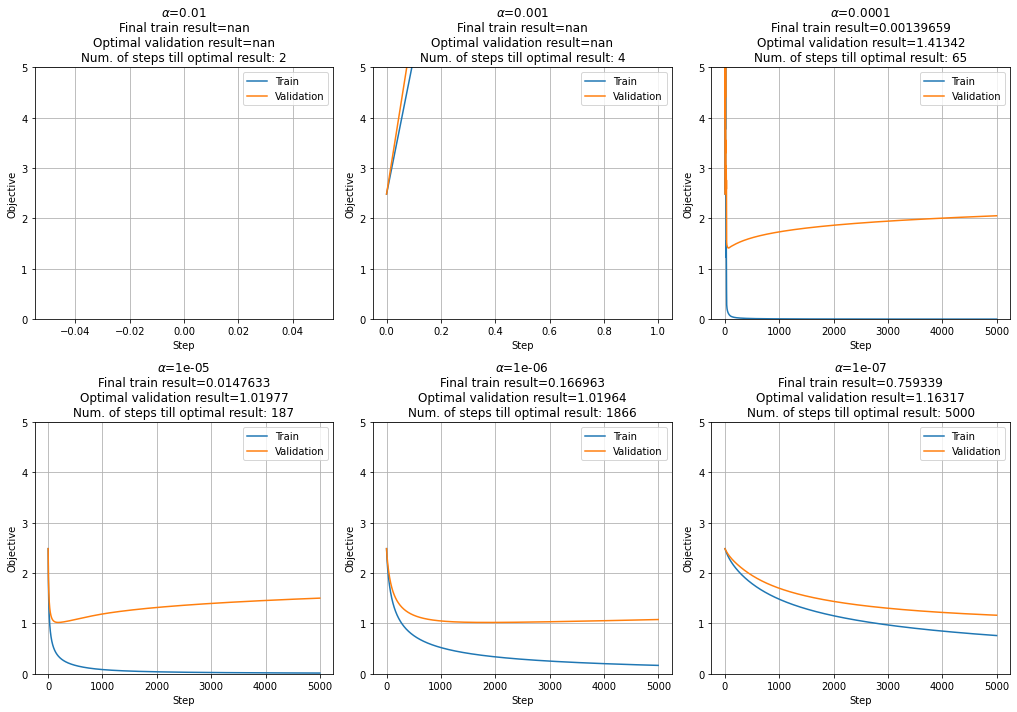

In [62]:
## Prepare plots
fig, axis_list = plt.subplots(2, 3, figsize=(15, 10))
n_iters = 5000
alpha_list = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

## Iterate over the learning rates
for i_alpha, alpha in enumerate(alpha_list):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    theta, objectives_array_train, objectives_array_val = basic_gradient_decent(g, grad_g, alpha, n_iters, features_train, y_train, features_val, y_val)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    ax = axis_list.flat[i_alpha]
    ax.plot(objectives_array_train, label='Train')
    ax.plot(objectives_array_val, label='Validation')
    ax.set_title('$\\alpha$={:g}\n'
                 'Final train result={:g}\n'
                 'Optimal validation result={:g}\n'
                 'Num. of steps till optimal result: {}'.format(alpha,
                                                                objectives_array_train[-1],
                                                                objectives_array_val.min(),
                                                                np.argmin(objectives_array_val) + 1))
    ax.set_xlabel('Step')
    ax.set_ylabel('Objective')
    ax.set_ylim(0, 5)
    ax.legend()
plt.tight_layout(rect=(0, 0, 0.95, 1))

### Selecting the Hyper-Parameters

We can see the overfitting effect, which at some point starts to cause the validation objective to degrade (increase). We would, therefore, like to pick out the hyper-parameters, which are the learning rate and the number of steps, which produce the best validation objective.

We will select the hyper-parameters, according to these 6 runs, and re-run the algorithm using these hyper-parameters.

(In practice the common way to avoid re-running the algorithm is to always store, during the run, the set of parameters ($\Theta^{\left(k\right)}$) which have produced the best validation objective so far.

#### Why can't we simply stop the algorithm when the validation objective to start to increase?

In general, the objective curves will not be so smooth, such as in this case, and therefore, it will be hard to catch the exact point in which where the degradation starts. We will only be able to do so in retrospective. Some reasons for why the curve can be "noisy":
- Stochastic gradient descent algorithms are noisy by nature.
- We have a more complex objective function.
- Gradient descent algorithm which uses momentum terms can sometimes go uphill before they continue to descent.
- Some other reasons...

✍️ Complete the following code to select the optimal learning rate and number on steps and re-run the algorithm.

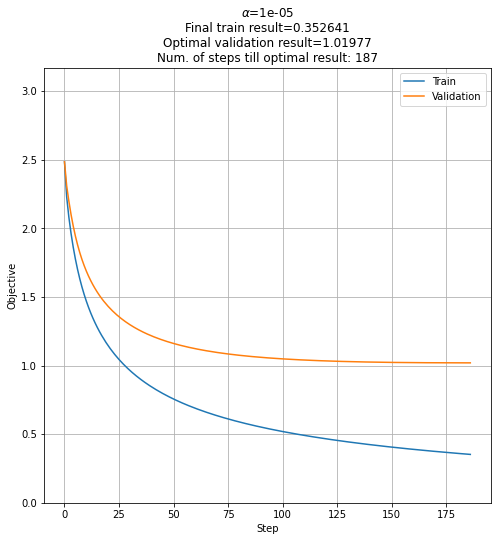

In [67]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
alpha = 1e-5
n_iters = 187
theta, objectives_array_train, objectives_array_val = basic_gradient_decent(g, grad_g, alpha, n_iters, features_train, y_train, features_val, y_val)
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

fig, ax = plt.subplots()
ax.plot(objectives_array_train, label='Train')
ax.plot(objectives_array_val, label='Validation')
ax.set_title('$\\alpha$={:g}\n'
             'Final train result={:g}\n'
             'Optimal validation result={:g}\n'
             'Num. of steps till optimal result: {}'.format(alpha,
                                                            objectives_array_train[-1],
                                                            objectives_array_val.min(),
                                                            np.argmin(objectives_array_val) + 1))
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.set_ylim(0, np.median(objectives_array_val) * 3)
ax.legend();


## Making predictions

After learning the probability function $p\left(y|\boldsymbol{x};\Theta\right)$, we would like to make a prediction based on:

$$
\hat{y}=\underset{y}{\arg\max}\ p\left(y|\boldsymbol{x};\Theta\right)=\underset{k}{\arg\max}\frac{e^{\boldsymbol{\theta}_{k}^T\boldsymbol{x}}}{\sum_{k'} e^{\boldsymbol{\theta}_{k'}^T\boldsymbol{x}}}=\underset{k}{\arg\max}\ \boldsymbol{\theta}_{k}^T\boldsymbol{x}
$$

✍️ Complete the following code to calculate the prediction for a given feature matrix:

The empirical risk (amount of missclassifications) on the test set is: 0.1762820512820513


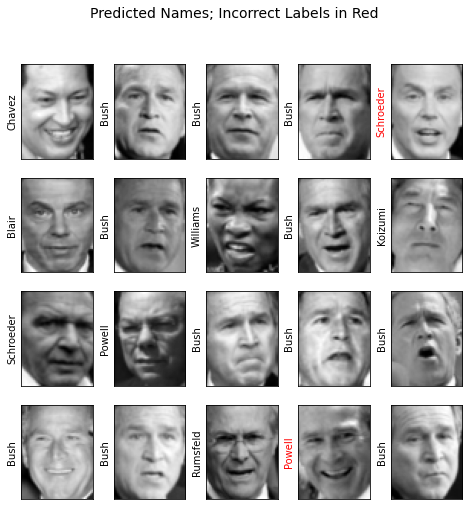

In [68]:
def predict(x, theta):
    """
    Predict y_hat

    Using:
    - N: The number of samples.
    - D: The number of features (n_pca_componens + 1).
    - K: The length of every q vector.

    Parameters
    ----------
    x: ndarray
        The N x D features matrix.
    theta: ndarray
        The K x D parameters matrix.

    Returns
    -------
    y_hat: ndarray
        The 1D array of length N of predicted labels.
    """
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    y_hat = np.argmax(x @ np.transpose(theta),axis=1)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return y_hat


y_hat_test = predict(features_test, theta)

empirical_risk_test = (y_hat_test != y_test).mean()

print('The empirical risk (amount of missclassifications) on the test set is: {}'.format(empirical_risk_test))

## Plot estimation
fig, ax_array = plt.subplots(4, 5)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel(label_to_name_mapping[y_hat_test[i]].split()[-1],
                   color='black' if y_hat_test[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

## L2 Regularization

Add an $L2$ regularization term to the optimization process to reduce the overfitting. The objective function will now be:
$$
\tilde{g}\left(\Theta;X,\boldsymbol{y}\right)=g\left(\Theta;X,\boldsymbol{y}\right)+\lambda\underbrace{\left\lVert\Theta\right\rVert_2^2}_{=\sum_{k,j}\theta_{k,j}^2}
$$

(Commonly the regularization term should not include the last column of $\Theta$, which is the bias term, multiplying the constant in the features matrix. We will ignore the fact here)

What is the gradient of the new objective function?

$$
\nabla_\Theta \tilde{g}\left(\Theta;X,\boldsymbol{y}\right)=\nabla_\Theta g\left(\Theta;X,\boldsymbol{y}\right)+?
$$

Therefore the gradient descent update step will now be:
$$
\Theta^{\left(k+1\right)}=\Theta^{\left(k\right)}-\alpha\nabla_\Theta g\left(\Theta^{\left(k\right)}\right)-?
$$

✍️ Complete the code below to implement a gradient descent with an $L2$ regularization.
- Use the exact same code you used for **basic_gradient_decent** and only make changes to the update step. Use the original objective $g$ (not $\tilde{g}$) to calculate the intermediate results **objectives_array_train** and **objectives_array_validation**.

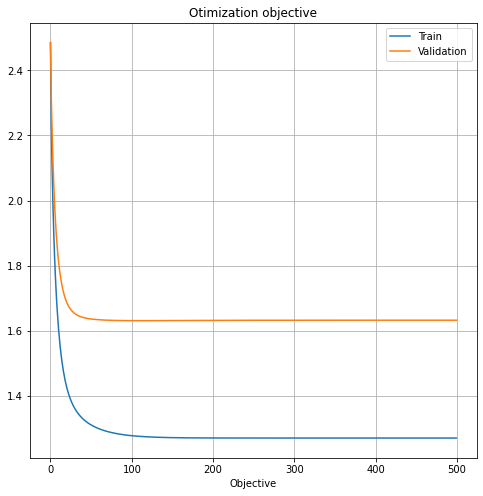

In [73]:
def gradient_decent_with_l2(g, grad_g, alpha, n_iters, x_train, y_train, x_val, y_val, llambda):
    """
    The gradient of the objective function.

    Using:
    - N: The number of samples.
    - D: The number of features (n_pca_componens + 1).
    - K: The length of every q vector.

    Parameters
    ----------
    g: funcion
        The objective function.
    grad_g: funcion
        The gradient of the objective function.
    alpha: float
        The learning rate.
    n_iters:
        The number of steps to take.
    x_train: ndarray
        The N x D features matrix of the train set.
    y_train: ndarray
        The 1D array of length N of labels of the validation set.
    x_val: ndarray
        The N x D features matrix of the train set.
    y_val: ndarray
        The 1D array of length N of labels of the validation set.
    llambda: float
        The regularization coefficient.

    Returns
    -------
    theta: ndarray
        The K x D parameters matrix which the algorithm produces.
    objectives_array_train: ndarray
        A 1D array of length n_iters which contains the value of the objective 
        at each step evaluated on the train set.
    objectives_array_train: ndarray
        A 1D array of length n_iters which contains the value of the objective 
        at each step evaluated on the validation set.
    """
    
    n_classes = max(y_train) + 1
    n_features = x_train.shape[1]
    
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    theta = np.zeros((n_classes, n_features))
    objectives_array_train = np.zeros(n_iters)
    objectives_array_val = np.zeros(n_iters)
    
    for k in range(n_iters):
      objectives_array_train[k] = g(theta, x_train, y_train) + llambda * np.sum(np.transpose(theta) @ theta)
      objectives_array_val[k] = g(theta, x_val, y_val) + llambda * np.sum(np.transpose(theta) @ theta)
      grad_g_cal = grad_g(theta, x_train, y_train) + 2 * llambda * theta
      theta = theta - alpha * grad_g_cal
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    return theta, objectives_array_train, objectives_array_val

alpha = 1e-5
n_iters = 500
llambda = 1e3
theta, objectives_array_train, objectives_array_val = gradient_decent_with_l2(g, grad_g, alpha, n_iters, features_train, y_train, features_val, y_val, llambda)

## Plot the objective
## ==================
fig, ax = plt.subplots()
ax.plot(objectives_array_train, label='Train')
ax.plot(objectives_array_val, label='Validation')
ax.set_title('Otimization objective')
ax.set_xlabel('Step')
ax.set_xlabel('Objective')
ax.legend();

## Selecting the Hyper-Parameters

The code below calculates and plots the results for $\alpha=10^{-5},10^{-6}$ and $\lambda=10^{4},10^{2},10^{0}$

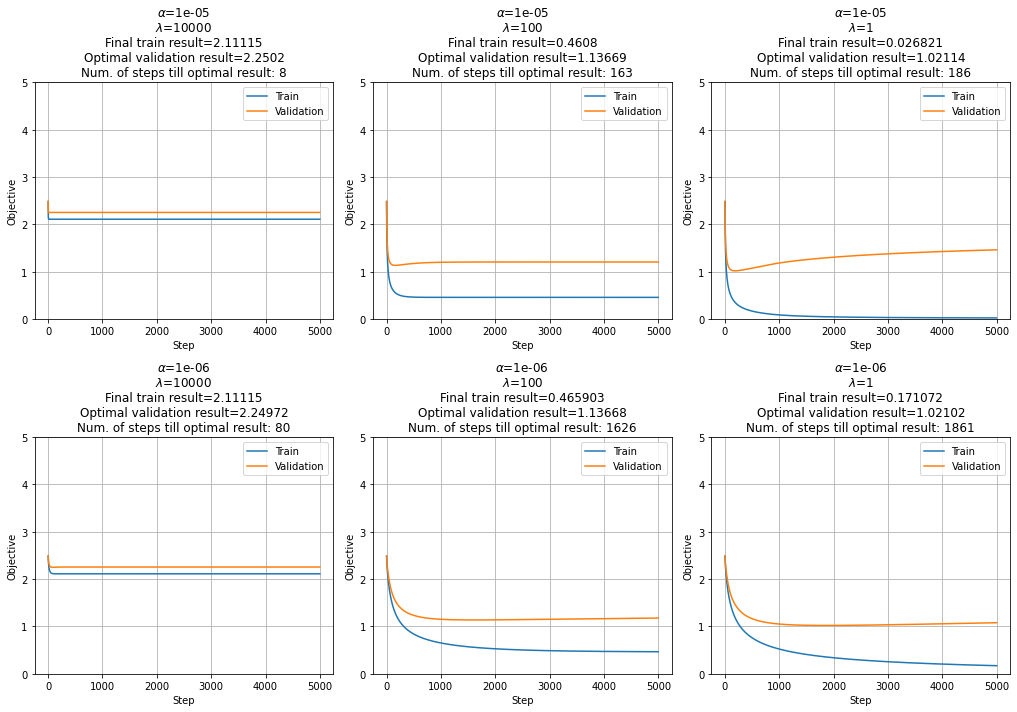

In [77]:
## Prepare plots
fig, axis_list = plt.subplots(2, 3, figsize=(15, 10))
n_iters = 5000
alpha_list = [1e-5, 1e-6]
lambda_list = [1e4, 1e2, 1e0]

## Iterate over the learning rates
for i_alpha, alpha in enumerate(alpha_list):
    for i_lambda, llambda in enumerate(lambda_list):
    
        theta, objectives_array_train, objectives_array_val = gradient_decent_with_l2(g, grad_g, alpha, n_iters, features_train, y_train, features_val, y_val, llambda)

        ax = axis_list[i_alpha][i_lambda]
        ax.plot(objectives_array_train, label='Train')
        ax.plot(objectives_array_val, label='Validation')
        ax.set_title('$\\alpha$={:g}\n'
                      '$\\lambda$={:g}\n'
                      'Final train result={:g}\n'
                      'Optimal validation result={:g}\n'
                      'Num. of steps till optimal result: {}'.format(alpha,
                                                                    llambda,
                                                                    objectives_array_train[-1],
                                                                    objectives_array_val.min(),
                                                                    np.argmin(objectives_array_val) + 1))
        ax.set_xlabel('Step')
        ax.set_ylabel('Objective')
        ax.set_ylim(0, 5)
        ax.legend()
plt.tight_layout(rect=(0, 0, 0.95, 1))

You should get that:
- For $\lambda=10^{4}$ the regularization is too strong and prevents the train objective form reaching a low objective value. This indeed prevents the validation objective from increasing, but it does not produce a good result.
- For $\lambda=10^{2}$ the regularization is able to significantly decrease the degradation of the validation objective and is even able to slightly improve the minimal value which the optimal validation objective is able to achieve. Sadly this is only results in a very small improvement.
- For $\lambda=10^{0}$ the regularization has almost no effect on the optimization process.

Preventing the validation objective from degrading is usually important as well as improving the minimal validation objective as it typically results in a more stable solution.

✍️ Select the optimal hyper-parameters and re-run the following code to calculate $\Theta$ and evaluate the model.

The empirical risk (amount of missclassifications) on the test set is: 0.1762820512820513


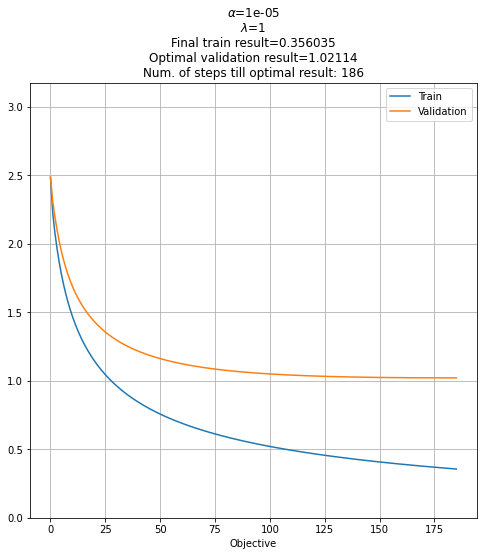

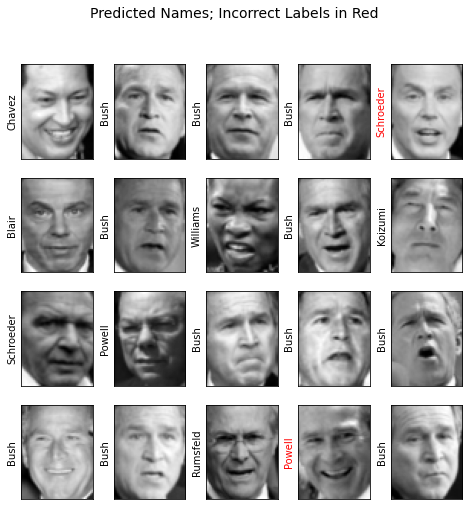

In [84]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
alpha = 1e-5
n_iters = 186
llambda = 1
theta, objectives_array_train, objectives_array_val = gradient_decent_with_l2(g, grad_g, alpha, n_iters, features_train, y_train, features_val, y_val, llambda)
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

fig, ax = plt.subplots()
ax.plot(objectives_array_train, label='Train')
ax.plot(objectives_array_val, label='Validation')
ax.set_title('$\\alpha$={:g}\n'
              '$\\lambda$={:g}\n'
              'Final train result={:g}\n'
              'Optimal validation result={:g}\n'
              'Num. of steps till optimal result: {}'.format(alpha,
                                                            llambda,
                                                            objectives_array_train[-1],
                                                            objectives_array_val.min(),
                                                            np.argmin(objectives_array_val) + 1))
ax.set_xlabel('Step')
ax.set_xlabel('Objective')
ax.set_ylim(0, np.median(objectives_array_val) * 3)
ax.legend();

## Calculate the test risk
y_hat_test = predict(features_test, theta)

empirical_risk_test = (y_hat_test != y_test).mean()

print('The empirical risk (amount of missclassifications) on the test set is: {}'.format(empirical_risk_test))

## Plot estimation
fig, ax_array = plt.subplots(4, 5)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel(label_to_name_mapping[y_hat_test[i]].split()[-1],
                   color='black' if y_hat_test[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

## Reminder: Submission

To submit your code, download it as a **ipynb** file from Colab, and upload it to the course's website. You can download this code by selecting **Download .ipynb** from the **file** menu.